In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [100]:
url="https://www.mohfw.gov.in/"

In [101]:
response=requests.get(url)
print(response)

<Response [200]>


In [102]:
#created a wrapper

soup=BeautifulSoup(response.content,"html.parser")

In [103]:
soup.title

<title>MoHFW | Home</title>

In [104]:
tables=soup.find_all("table")
table0=tables[0]
# table0
# list_data=[]

# data={
#     "State":None,
#     "Total_confirmed_cases":None,
#     "Cured_discharged_migrated":None,
#     "Deaths":None
# }

# rows=table0.find_all("tr")[1:-3]

# for row in rows:
#     col=row.find_all("td")
#     data={
#     "State":None,
#     "Total_confirmed_cases":None,
#     "Cured_discharged_migrated":None,
#     "Deaths":None}
    
#     try:
        
#         data["State"]=col[1].text.strip()
#         data["Total_confirmed_cases"]=int(col[2].text.strip())
#         data["Cured_discharged_migrated"]=int(col[3].text.strip())
#         data["Deaths"]=int(col[4].text.strip())
#         list_data.append(data)
        
#     except:
#         print("Blank")
# #print(list_data)
# print(sorted(list_data,key=itemgetter('Total_confirmed_cases'),reverse=True))

# Below 4 lists are made in order to take all values into consideration

In [105]:
state=[]
total_confirmed_cases=[]
cured_discharged_migrated=[]
deaths=[]

rows=table0.find_all("tr")
rows
for row in rows:
    col=row.find_all("td")
    try:
        
        state.append(col[1].text.strip())
        total_confirmed_cases.append(int(col[2].text.strip()))
        cured_discharged_migrated.append(int(col[3].text.strip()))
        deaths.append(int(col[4].text.strip()))
    except:
        print("")
        
print(state)








['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', '67152#']


# Converted all the lists into a single dataframs consisting of all the columns

In [106]:
df=pd.DataFrame(list(zip(state,total_confirmed_cases,cured_discharged_migrated,deaths)),columns=["State",
"Total_confirmed_cases",
"Cured_Discharged_Migrated",
"Deaths"])

df["Active_cases"]=df["Total_confirmed_cases"]-df["Cured_Discharged_Migrated"]-df["Deaths"]

df

,State,Total_confirmed_cases,Cured_Discharged_Migrated,Deaths,Active_cases
0,Andaman and Nicobar Islands,33,33,0,0
1,Andhra Pradesh,1980,925,45,1010
2,Arunachal Pradesh,1,1,0,0
3,Assam,63,34,2,27
4,Bihar,696,365,6,325
5,Chandigarh,169,24,2,143
6,Chhattisgarh,59,49,0,10
7,Dadar Nagar Haveli,1,0,0,1
8,Delhi,6923,2069,73,4781
9,Goa,7,7,0,0


# Sorted the dataframe by Total Confirmed Cases. Also sorted by the number of active cases so that we get to know the Green Zone States. Displaying the green zone states might give a clear picture

In [129]:

from operator import itemgetter
df2=df.sort_values("Total_confirmed_cases",ascending=False)
#lt.rcParams['figure.figsize']=(40,25)
df3=df.sort_values("Active_cases",ascending=True)

No_cases_states=df3.loc[df3["Active_cases"]==0]
No_cases_states

,State,Total_confirmed_cases,Cured_Discharged_Migrated,Deaths,Active_cases
0,Andaman and Nicobar Islands,33,33,0,0
2,Arunachal Pradesh,1,1,0,0
22,Mizoram,1,1,0,0
20,Manipur,2,2,0,0
9,Goa,7,7,0,0


# Plotted a multiple bar plot

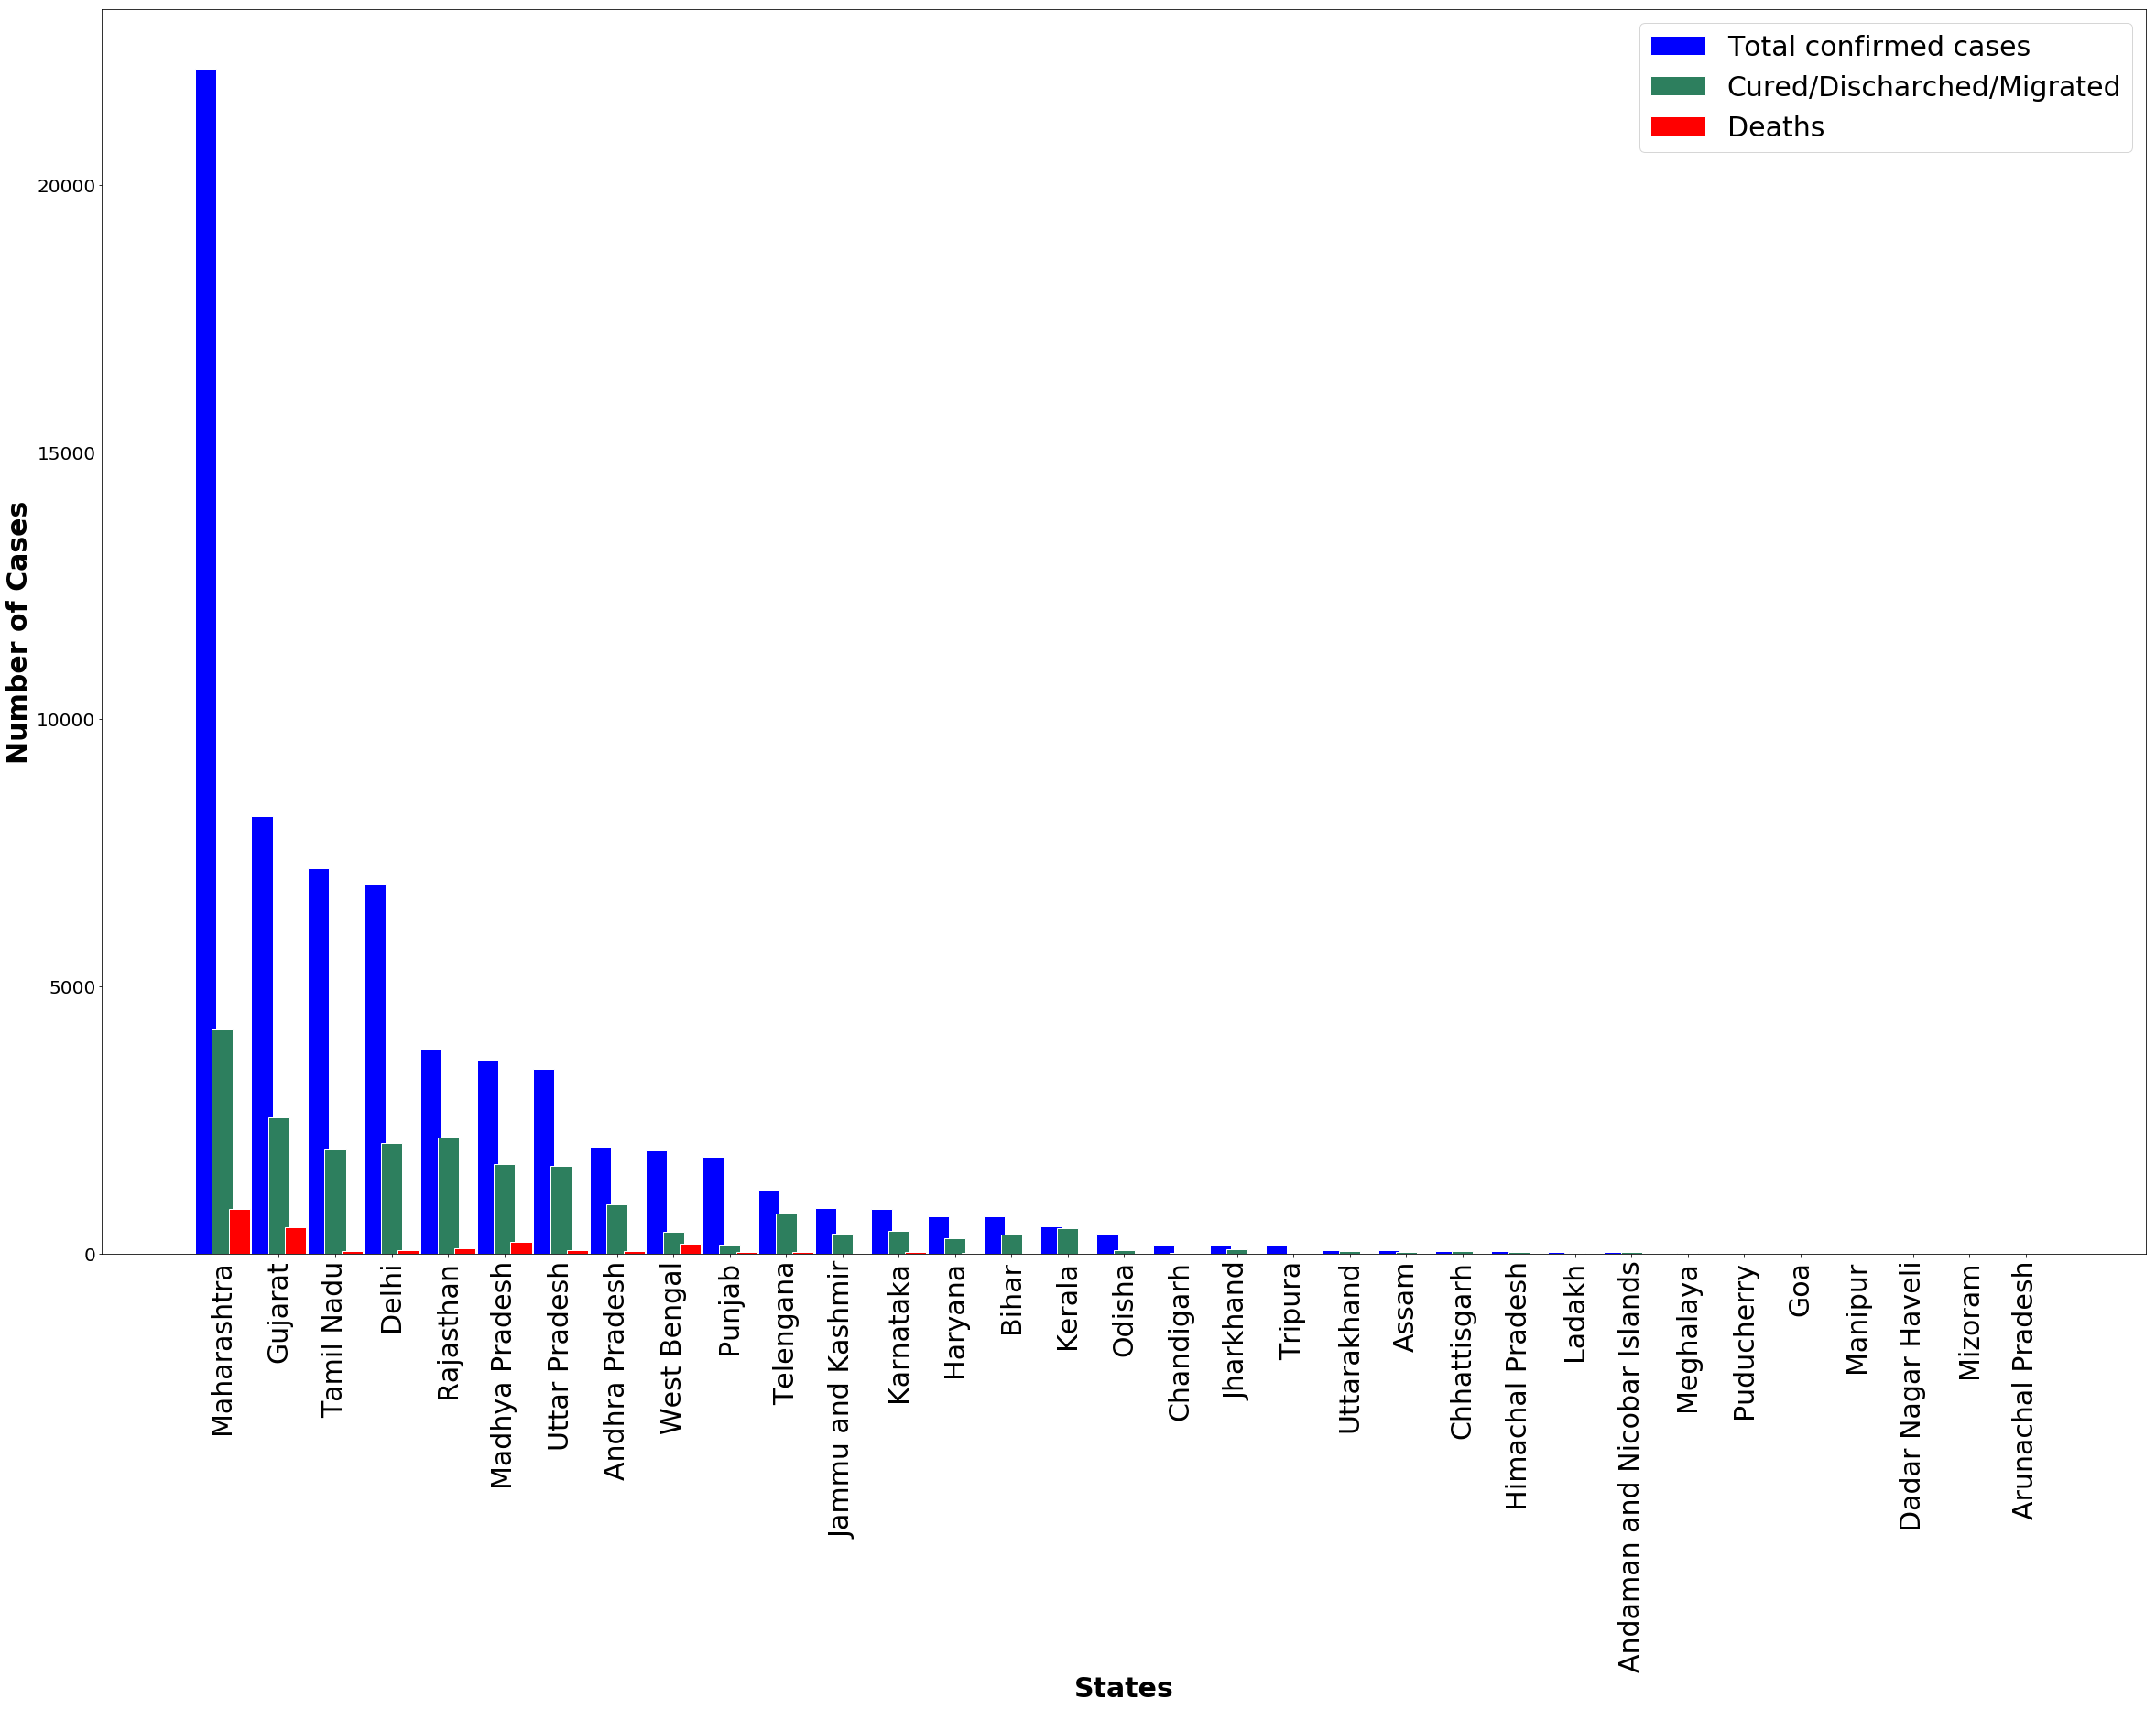

In [124]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
 
# set height of bar
bars1 = df2["Total_confirmed_cases"].to_numpy()
bars2 =  df2["Cured_Discharged_Migrated"].to_numpy()
bars3 = df2["Deaths"].to_numpy()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.figure(figsize=(40,25))
# Make the plot
plt.bar(r1, bars1, color='blue', width=1.25*barWidth, edgecolor='white', label='Total confirmed cases')
plt.bar(r2, bars2, color='#2d7f5e', width=1.25*barWidth, edgecolor='white', label='Cured/Discharched/Migrated')
plt.bar(r3, bars3, color='red', width=1.25*barWidth, edgecolor='white', label='Deaths')
 
# Add xticks on the middle of the group bars
plt.ylabel('Number of Cases', fontweight='bold',fontsize="30",rotation="vertical")
plt.xlabel('States', fontweight='bold',fontsize="30")
plt.xticks([r + barWidth for r in range(len(bars1))], df2["State"],rotation="vertical",fontsize="30")
plt.yticks(fontsize="20")


# Create legend & Show graphic
plt.legend(fontsize="30")
#plt.show()


# A pie plot based on total confirmed cases

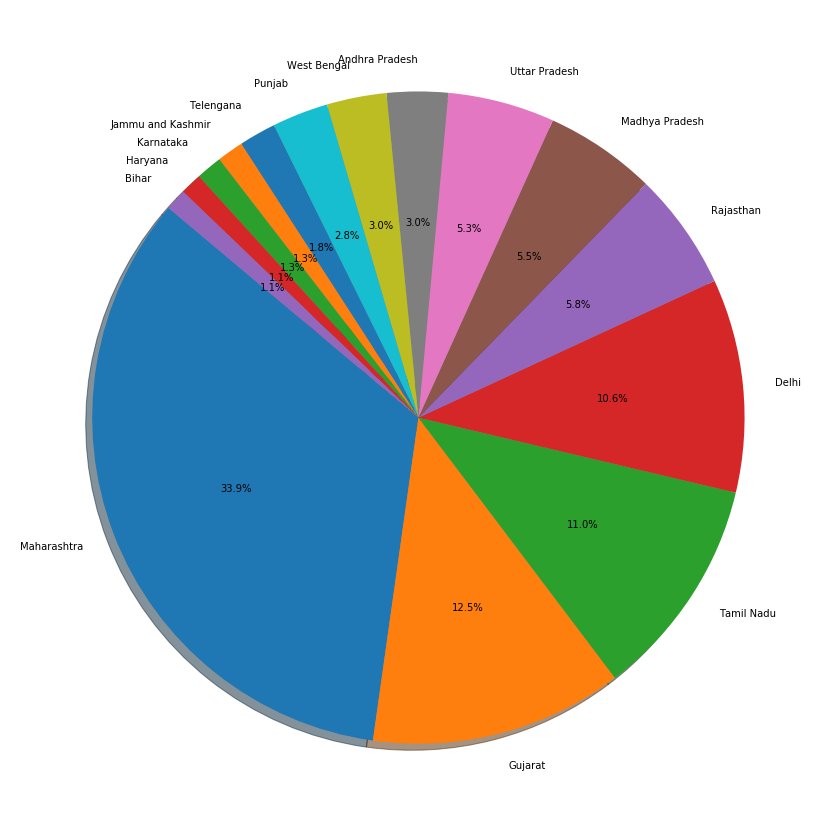

In [125]:
df3=df2.iloc[:15]
df3
plt.figure(figsize=(15,15))
labels=df3["State"]
plt.figsize=(2,5)
sizes=df3["Total_confirmed_cases"]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis=('equal')
#plt.show()

# In plotly, plotted a multi bar plot so that easy interactive visualizations can be done.

In [119]:
import plotly.graph_objs as go
fig = go.Figure([go.Bar(name="Total confirmed Cases",
                        x=df2['State'][0:15],
                        y=df2['Total_confirmed_cases'],
                        marker_color='indianred'),
                 go.Bar(name="Cured/Discharged",
                        x=df2['State'][0:15], 
                        y=df2["Cured_Discharged_Migrated"],
                       marker_color='lightsalmon'),
                 go.Bar(name="Deaths",
                        x=df2['State'][0:15], 
                        y=df2["Deaths"],
                       marker_color='red')
                ])

fig.update_layout(barmode='group')
#fig.show()

# In Dash, Showing visualizations also for Pie CHarts based on the Confirmed cases as well as deaths in different states

In [114]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import plotly.express as px
import dash_bootstrap_components as dbc

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
# df= pd.read_csv(r"C:\Users\admin\Desktop\Covid_data.csv")

def generate_table(dataframe, max_rows=30):
    return html.Table(className="responsive-table",
                      children=[
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    
    ])


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

card_content1 = [
    dbc.CardHeader("Card header"),
    dbc.CardBody(
        [
            html.H5("Total Cases", className="card-title"),
            
                df2["Total_confirmed_cases"].sum()

        ]
    ),
]

card_content2 = [
    dbc.CardHeader("Card header"),
    dbc.CardBody(
        [
            html.H5("Total Recovered", className="card-title"),
            
                df2["Cured_Discharged_Migrated"].sum()

        ]
    ),
]


card_content3 = [
    dbc.CardHeader("Card header"),
    dbc.CardBody(
        [
            html.H5("Total Deaths", className="card-title"),
            
                df2["Deaths"].sum()

        ]
    ),
]




app.layout = html.Div([
    
    
    
    html.H1(children='Statewise Distribution of Covid-19 in India',
           style={
               'textAlign':'center',
               'color':'darkgreen'
           }),
    html.Div([
    dbc.Row(
    [
        dbc.Col(dbc.Card(card_content1, color="blue", outline=True)),
        dbc.Col(dbc.Card(card_content2, color="secondary", outline=True)),
        dbc.Col(dbc.Card(card_content3, color="info", outline=True)),
    ],className="mb-4", style={
               'textAlign':'center',
               'color':'grey'
           }),
    ]),
    
    html.Div([
    dcc.Graph(figure=fig)
    
    ],style={"border":"2px black solid"}),
    
    html.Div([
    html.Div([
        dcc.Graph(id='g1',
                 figure={
                     'data': [
                         go.Pie(values=df2['Total_confirmed_cases'][0:11],
                               labels=df2['State'][0:11])
                     ],
                     'layout': go.Layout(title="Total Cases",autosize=True)
                 }),
    ],className="six columns"),
        
        html.Div([
        
         dcc.Graph(id='g2',
                 figure={
                     'data': [
                         go.Pie(values=df2["Deaths"][0:11],
                               labels=df2['State'][0:11])
                     ],
                     'layout': go.Layout(title="Deaths",autosize=True)
                 }),
        ],className="six columns"),
    ],className="row"),
    
    html.Div([
        dcc.Graph(id='Recovered Bar Plot',
                 figure={
                     'data': [
                         go.Bar(x=df2['State'][0:30],
                               y=df2["Active_cases"][0:30],
                               marker_color='indianred')
                     ],
                     'layout': go.Layout(title="Active Cases in the States",autosize=True)
                 })
        
    ]),
   
#      html.Div(
#          generate_table(df2))
],style={
    'backgroundColor':'#c3cfc2'
})

app.css.append_css({
       'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
   })
    
        



In [115]:
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [11/May/2020 15:11:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2020 15:11:58] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [11/May/2020 15:11:58] "GET /_dash-layout HTTP/1.1" 200 -


In [ ]:
import plotly.graph_objects as go
import plotly.express as px


fig = px.pie(df2, values='Total_confirmed_cases', names='State')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# Also made cards for the three features to displat total. 